In [1]:
import pandas as pd
import os
from glob import glob
import linecache
from sklearn.model_selection import train_test_split
import pickle

In [55]:
path = os.getcwd()
print(path)

/home/guest/Desktop/BERT


In [3]:
categories = [name for name in os.listdir("ldcc-20140209.tar/text") if os.path.isdir("ldcc-20140209.tar/text/" + name)]
print(categories)

FileNotFoundError: [Errno 2] No such file or directory: 'ldcc-20140209.tar/text'

In [4]:
datasets = pd.DataFrame(columns=["title", "category"])
for cat in categories:
    path = "ldcc-20140209.tar/text/" + cat + "/*.txt"
    files = glob(path)
    for text_name in files:
        title = linecache.getline(text_name, 3)
        s = pd.Series([title, cat], index=datasets.columns)
        datasets = datasets.append(s, ignore_index=True)

NameError: name 'categories' is not defined

In [5]:
# データフレームシャッフル
datasets = datasets.sample(frac=1).reset_index(drop=True)
datasets.head()

,title,category


In [6]:
#datasets = pd.read_csv('Reuter_data/TITLE-category-split0-700.csv')
datasets = pd.read_csv('Reuter_data/NEWS-category-split0-700.csv')

In [7]:
datasets.head()

,date,NEWS,category
0,2011-06-14 04:02:17+00:00,[ ［パリ １３日 ロイター］ １９９１年に死去した仏歌手セルジュ・ゲンスブールの曲が、高級...,entertainmentNews
1,2011-06-15 01:31:32+00:00,[ ［ロサンゼルス １４日 ロイター］ 映画「ブラック・スワン」でアカデミー主演女優賞に輝い...,entertainmentNews
2,2011-06-15 01:37:23+00:00,[ ［ロサンゼルス １４日 ロイター］ 米男性娯楽誌「プレイボーイ」の創刊者ヒュー・ヘフナー...,entertainmentNews
3,2011-06-15 02:27:28+00:00,[ ［ニューヨーク １４日 ロイター］ 米シンガーソングライターのキャロル・キングさんが、回...,entertainmentNews
4,2011-06-16 00:19:46+00:00,[ ［ロンドン １５日 ロイター］ 英女優でモデルのエリザベス・ハーレーさん（４６）が１５日...,entertainmentNews


In [8]:
for i in range(0,len(datasets)):
    text = datasets['NEWS'][i]
    try:
        if len(text) > 500:
            text = text[0:500]
    except AttributeError as t:
        text = 'aaaaaaaaaaaaa'
    datasets['NEWS'][i] = text

In [9]:
with open("Reuter_data/Reuter_NEWS-category.pickle", 'wb') as f:
    pickle.dump(datasets,f)

In [10]:
# データセット格納先
drive_dir = "Reuter_data/"

In [11]:
with open(drive_dir + "Reuter_NEWS-category.pickle", 'rb') as f:
    livedoor_data = pickle.load(f)

In [12]:
categories = list(set(livedoor_data['category']))
print(categories)

['entertainmentNews', 'sportsNews', 'technologyNews', 'domesticJPNews', 'oddlyEnoughNews', 'business', 'worldNews']


In [13]:
# カテゴリーのID辞書を作成
id2cat = dict(zip(list(range(len(categories))), categories))
cat2id = dict(zip(categories, list(range(len(categories)))))
print(id2cat)
print(cat2id)

{0: 'entertainmentNews', 1: 'sportsNews', 2: 'technologyNews', 3: 'domesticJPNews', 4: 'oddlyEnoughNews', 5: 'business', 6: 'worldNews'}
{'entertainmentNews': 0, 'sportsNews': 1, 'technologyNews': 2, 'domesticJPNews': 3, 'oddlyEnoughNews': 4, 'business': 5, 'worldNews': 6}


In [14]:
livedoor_data['category_id'] = livedoor_data['category'].map(cat2id)

In [15]:
livedoor_data = livedoor_data.sample(frac=1).reset_index(drop=True)

In [16]:
livedoor_data = livedoor_data[['NEWS', 'category_id']]
livedoor_data.head()

,NEWS,category_id
0,[［モンペリエ（フランス） １３日 ロイター］ - サッカー女子のブラジル代表マルタ（３３）...,1
1,[［ロサンゼルス １４日 ロイター］ - 昨年１２月に６０歳で死去した米女優キャリー・フィッ...,0
2,[［ブエノスアイレス ２０日 ロイター］ - 経済危機が続く南米のアルゼンチンで、避妊具の売...,4
3,[［東京 ２０日 ロイター］ - 安倍晋三首相は２０日、米政府による自動車関税措置などの貿易...,3
4,[［東京 ２６日 ロイター］ - ＮＴＴドコモ9437.Tは２６日、料金プラン「ギガホ」「ギ...,2


In [17]:
train_df, test_df = train_test_split(livedoor_data, train_size=0.8)
print("学習データサイズ", train_df.shape[0])
print("テストデータサイズ", test_df.shape[0])

学習データサイズ 34737
テストデータサイズ 8685


In [18]:
train_df.to_csv(drive_dir+'train.tsv', sep='\t', index=False, header=None)
test_df.to_csv(drive_dir+'test.tsv', sep='\t', index=False, header=None)

In [19]:
import torch
import torchtext
from transformers.modeling_bert import BertModel
from transformers.tokenization_bert_japanese import BertJapaneseTokenizer

/home/guest/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/guest/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/guest/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/guest/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [20]:
tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

In [21]:
text = list(train_df['NEWS'])[0]
wakati_ids = tokenizer.encode(text, return_tensors='pt')
print(tokenizer.convert_ids_to_tokens(wakati_ids[0].tolist()))
print(wakati_ids)
print(wakati_ids.size())

['[CLS]', '[[', 'ウェリントン', '16', '日', 'ロイ', '##ター', ']', '-', '世界', 'の', 'ラグビー', 'における', '「', 'アイ', '##ランダ', '##ー', '(', '太平洋', '島', '##しょ', '国', ')」', 'の', '存在', '感', 'は', '否定', 'でき', 'ない', '。', '何', '##しろ', '、', 'プロ', 'ラグビー', '選手', 'の', '5', '人', 'に', '1', '人', 'は', 'トンガ', '、', 'フィジー', '、', 'サモア', 'に', 'ルーツ', 'を', '持っ', 'て', 'いる', 'から', 'だ', '。', ',', 'だ', 'が', '、', '出身', '選手', 'の', '華やか', 'な', '活躍', 'と', 'は', '裏腹', 'に', '、', '太平洋', '島', '##しょ', '国', 'にとって', '日本', 'で', '開催', 'さ', 'れる', '今年', 'の', 'ワールドカップ', 'は', 'またも', '##や', '失望', 'に', '終わり', 'そう', 'に', '見える', '。', ',', '弱い', '経済', '基盤', '、', '資金', '不足', '、', '国内', 'で', 'の', '活躍', 'の', '場', 'の', '乏', '##し', 'さ', 'ー', '。', 'こうした', '慢性', '的', 'な', '問題', 'が', '島', '##しょ', '国', 'の', 'ラグビー', '強化', 'を', '阻', '##ん', 'で', 'おり', '、', '状況', 'は', 'むしろ', '以前', 'より', 'も', '悪化', 'し', 'て', 'いる', 'の', 'で', 'は', 'ない', 'か', 'という', '苛', '##立ち', 'すら', '高まっ', 'て', 'いる', '。', ',', '<', '##「', 'やる', 'べき', 'こと', 'は', 'まだ', 'ある', '」', '>', '##,', 'アイ', '##ラン

375


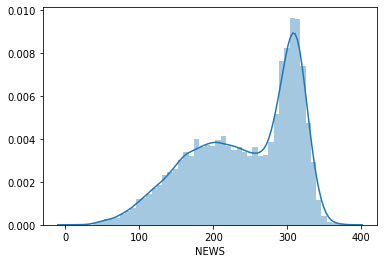

In [22]:
# 日本語BERTで扱える文章の長さは512だけど、livedoorニュースのタイトルの長さは最大でもCLS, SEPトークン入れても76
import seaborn as sns
title_length = livedoor_data['NEWS'].map(tokenizer.encode).map(len)
print(max(title_length))

sns.distplot(title_length)

In [23]:
def bert_tokenizer(text):
    return tokenizer.encode(text, return_tensors='pt')[0]

In [24]:
TEXT = torchtext.data.Field(sequential=True, tokenize=bert_tokenizer, use_vocab=False, lower=False,
                            include_lengths=True, batch_first=True, pad_token=0)
LABEL = torchtext.data.Field(sequential=False, use_vocab=False)

In [25]:
train_data, test_data = torchtext.data.TabularDataset.splits(
    path=drive_dir,train='train.tsv', test='test.tsv', format='tsv', fields=[('Text', TEXT), ('Label', LABEL)])

In [26]:
BATCH_SIZE = 32
train_iter, test_iter = torchtext.data.Iterator.splits(
    (train_data, test_data), batch_sizes=(BATCH_SIZE, BATCH_SIZE), repeat=False, sort=False)

In [27]:
model = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

In [28]:
# 上で作ったテストデータのイテレータから
batch = next(iter(test_iter))
print(batch.Text[0].size())

torch.Size([32, 340])


In [29]:
# BERTの順伝搬時にoutput_attentions=TrueでAttention weightを取得できる
last_hidden_state, pooler_output, attentions = model(batch.Text[0], output_attentions=True)
print(last_hidden_state.size())
print(pooler_output.size())
print(len(attentions), attentions[-1].size())

torch.Size([32, 340, 768])
torch.Size([32, 768])
12 torch.Size([32, 12, 340, 340])


In [30]:
from torch import nn
import torch.nn.functional as F

In [31]:
class BertClassifier(nn.Module):
    def __init__(self):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
        # BERTの隠れ層の次元数は768, livedoorニュースのカテゴリ数が9
        self.linear = nn.Linear(768, 7)
        # 重み初期化処理
        nn.init.normal_(self.linear.weight, std=0.02)
        nn.init.normal_(self.linear.bias, 0)
    
    def forward(self, input_ids):
        # last_hidden_stateとattentionsを受け取る
        vec, _, attentions = self.bert(input_ids, output_attentions=True)
        # 先頭トークンclsのベクトルだけ取得
        vec = vec[:,0,:]
        vec = vec.view(-1, 768)
        # 全結合層でクラス分類用に次元を変換
        out = self.linear(vec)
        return F.log_softmax(out), attentions

classifier = BertClassifier()

In [32]:
# まずは全部OFF
for param in classifier.parameters():
    param.requires_grad = False

# BERTの最後の層だけ更新ON
for param in classifier.bert.encoder.layer[-1].parameters():
    param.requires_grad = True

# クラス分類のところもON
for param in classifier.linear.parameters():
    param.requires_grad = True

In [33]:
import torch.optim as optim

# 事前学習済の箇所は学習率小さめ、最後の全結合層は大きめにする。
optimizer = optim.Adam([
    {'params': classifier.bert.encoder.layer[-1].parameters(), 'lr': 5e-5},
    {'params': classifier.linear.parameters(), 'lr': 1e-4}
])

In [34]:
# 損失関数の設定
loss_function = nn.NLLLoss()

In [36]:
for epoch in range(5):
    all_loss = 0
    for idx, batch in enumerate(train_iter):
        batch_loss = 0
        classifier.zero_grad()
        input_ids = batch.Text[0]
        label_ids = batch.Label
        out, _ = classifier(input_ids)
        batch_loss = loss_function(out, label_ids)
        batch_loss.backward()
        optimizer.step()
        all_loss += batch_loss.item()
    print("epoch", epoch, "\t" , "loss", all_loss)

/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch 0 	 loss 699.704464673996
epoch 1 	 loss 517.2142637819052
epoch 2 	 loss 466.3073783814907
epoch 3 	 loss 422.25271241366863
epoch 4 	 loss 383.69562666118145


In [37]:
from sklearn.metrics import classification_report

answer = []
prediction = []
with torch.no_grad():
    for batch in test_iter:

        text_tensor = batch.Text[0]
        label_tensor = batch.Label

        score, _ = classifier(text_tensor)
        _, pred = torch.max(score, 1)

        prediction += list(pred.numpy())
        answer += list(label_tensor.numpy())
print(classification_report(prediction, answer, target_names=categories))

/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


                   precision    recall  f1-score   support

entertainmentNews       0.93      0.94      0.94      1260
       sportsNews       0.97      0.96      0.96      1221
   technologyNews       0.85      0.82      0.84      1275
   domesticJPNews       0.82      0.78      0.80      1331
  oddlyEnoughNews       0.89      0.89      0.89      1112
         business       0.35      0.49      0.41       978
        worldNews       0.65      0.54      0.59      1508

         accuracy                           0.77      8685
        macro avg       0.78      0.77      0.77      8685
     weighted avg       0.79      0.77      0.78      8685



In [43]:
batch.Label

tensor([3, 0, 1, 6])

# labeling

In [39]:
no_label = pd.read_csv('Reuter_data/NEWS-split2010-2019.csv')

In [40]:
for i in range(0,len(no_label)):
    text = no_label['NEWS'][i]
    try:
        if len(text) > 500:
            text = text[0:500]
    except TypeError as t:
        text = 'aaaaaaaaaaaaa'
    no_label['NEWS'][i] = text

/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
no_label = no_label.drop('date', axis=1)
no_label = no_label.drop('Unnamed: 0', axis=1)
no_label['label'] = 0 

In [80]:
no_label.to_csv(drive_dir+'labeling.tsv', sep='\t', index=False, header=None)

In [81]:
TEXT = torchtext.data.Field(sequential=True, tokenize=bert_tokenizer, use_vocab=False, lower=False,
                            include_lengths=True, batch_first=True, pad_token=0)

In [82]:
news_data = torchtext.data.TabularDataset(path=drive_dir+'labeling.tsv', format='tsv', fields=[('Text', TEXT), ('Label', LABEL)])

In [83]:
BATCH_SIZE = 32
news_iter = torchtext.data.Iterator(news_data, batch_size=BATCH_SIZE, repeat=False, sort=False)

In [85]:
# BERTの順伝搬時にoutput_attentions=TrueでAttention weightを取得できる
last_hidden_state, pooler_output, attentions = model(batch.Text[0], output_attentions=True)
print(last_hidden_state.size())
print(pooler_output.size())
print(len(attentions), attentions[-1].size())

torch.Size([13, 318, 768])
torch.Size([13, 768])
12 torch.Size([13, 12, 318, 318])


In [86]:
prediction = []
with torch.no_grad():
    for batch in news_iter:

        text_tensor = batch.Text[0]
        label_tensor = batch.Label

        score, _ = classifier(text_tensor)
        _, pred = torch.max(score, 1)

        prediction += list(pred.numpy())

/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
no_label['label'] = prediction

In [109]:
no_label.to_csv('on_label.csv')

In [90]:
len(prediction)

372256

In [91]:
len(news_data)

372256